## American Put

In [1]:
import numpy as np
import pandas as pd
from finite_difference_method import FiniteDifferenceMethod

In [2]:
# set mesh
mesh = np.power(2, range(4, 13))

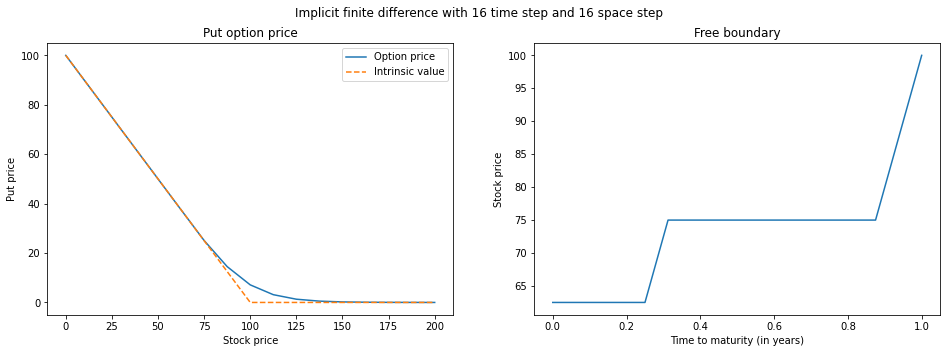

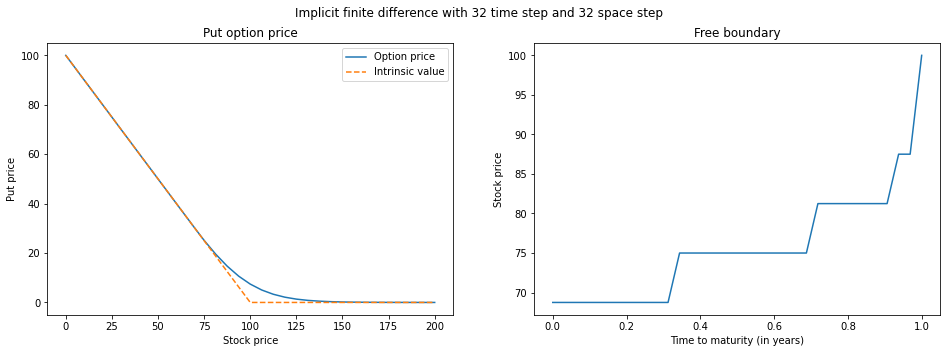

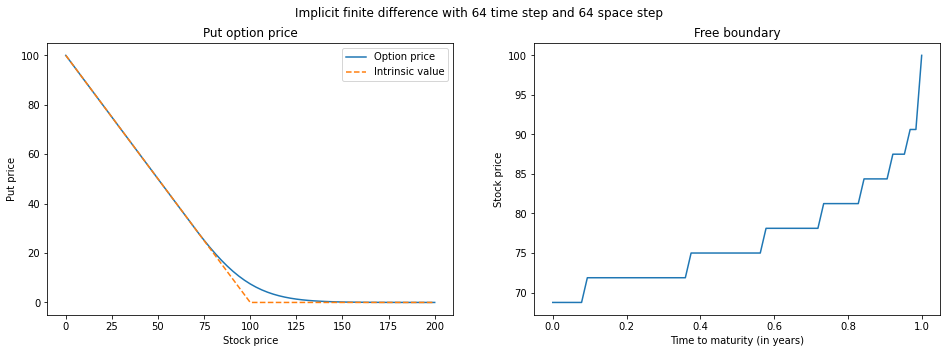

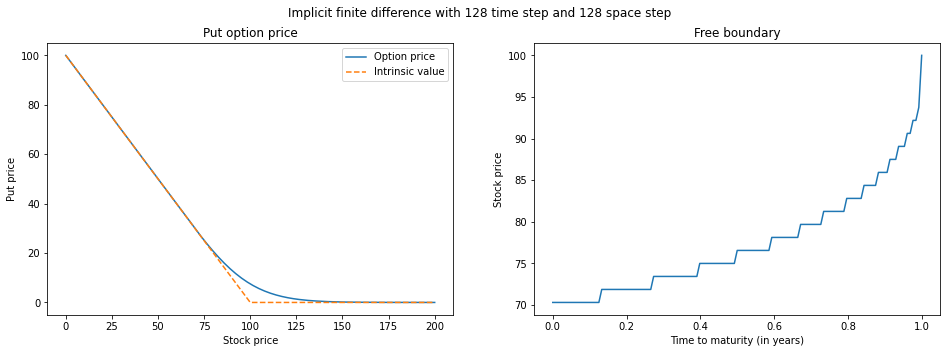

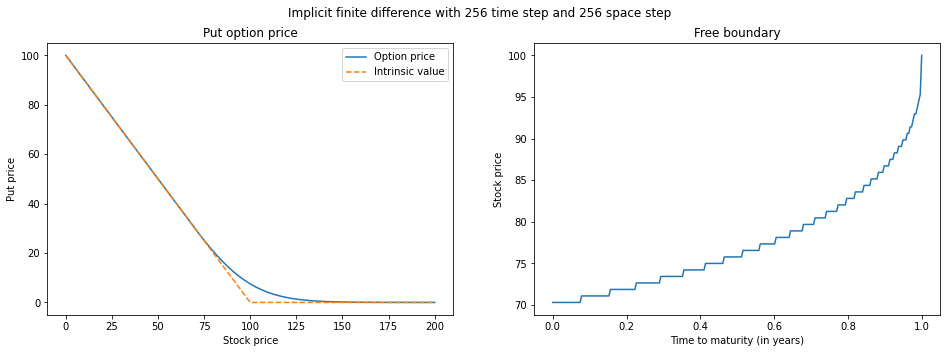

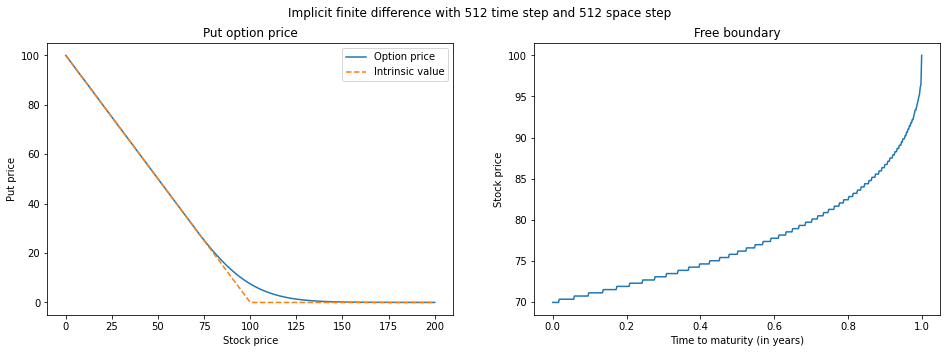

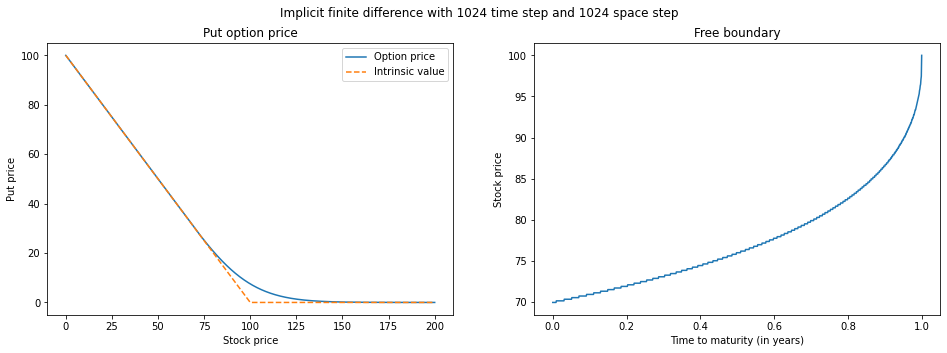

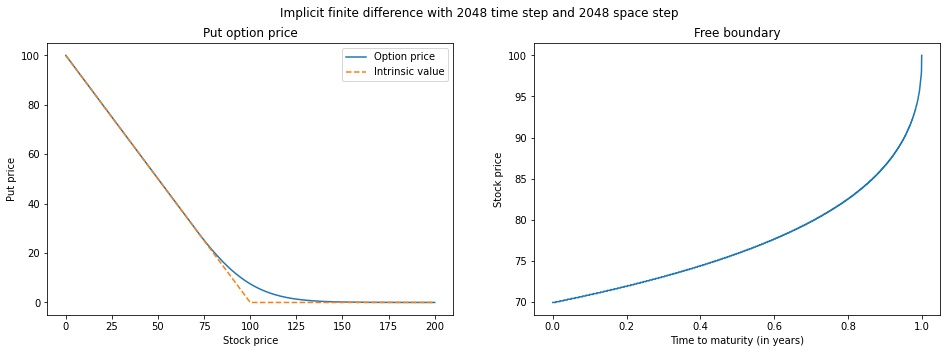

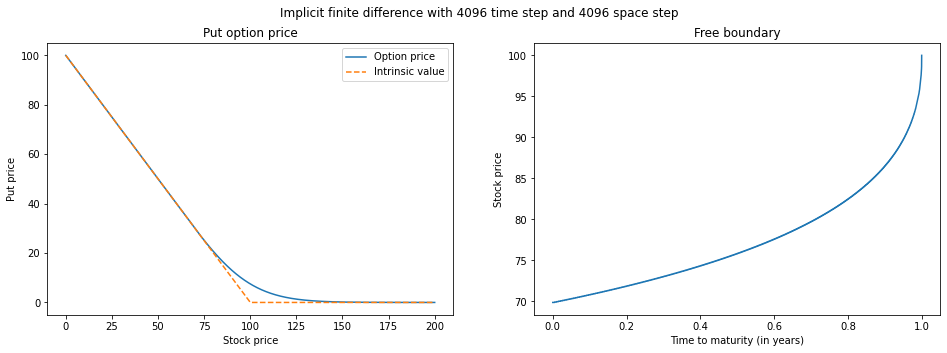

In [3]:
# instantize class of finite difference method
dict_value = {}
fdm_ap = FiniteDifferenceMethod(r=0.01, sigma=0.2, K=100, T=1)
for n in mesh:
    value, boundary = fdm_ap.implicit_scheme(upper_bound=200, time_step=n, space_step=n)
    dict_value[n] = value
    fdm_ap.plot_real_value_boundary()

In [4]:
convergence = {}
for i in range(len(mesh)):
    
    if i + 1 != len(mesh):
        prices = [dict_value[mesh[i + 1]][2*j] - dict_value[mesh[i]][j] for j in range(len(dict_value[mesh[i]]))]
    
    error = max(np.abs(prices))
    mesh_size = str(mesh[i]) + " x " + str(mesh[i])
    
    if mesh[i] == mesh[0]:
        convergence[mesh_size] = [ error, "N/A" ]
    else:
        old_mesh_size = str(mesh[i - 1]) + " x " + str(mesh[i - 1])
        convergence[mesh_size] = [error, (convergence[old_mesh_size][0])/error]

In [5]:
convergence_df = pd.DataFrame(convergence).T
convergence_df.rename(columns={0:"error", 1:"ratio of error"})

,error,ratio of error
16 x 16,0.31322,N/A
32 x 32,0.066521,4.708599
64 x 64,0.015156,4.389201
128 x 128,0.003232,4.688787
256 x 256,0.001695,1.906698
512 x 512,0.000872,1.943748
1024 x 1024,0.000441,1.976852
2048 x 2048,0.000221,1.997882
4096 x 4096,0.000221,1.0
